In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
import seaborn as sns

def plot_results(results, time, spikes, position):
    spike_ind, neuron_ind = np.nonzero(spikes)

    fig, axes = plt.subplots(4, 1, figsize=(18, 10), sharex=True, constrained_layout=True)
    axes[0].plot(time, position)
    axes[0].set_ylabel('Linear Distance')
    axes[0].set_title('Spikes')
    axes[1].scatter(time[spike_ind], neuron_ind + 1, color='black', s=2)
    axes[1].set_ylabel('Neuron Index')
    results.non_local_probability.plot(x='time', ax=axes[2], clip_on=False)
    axes[2].set_ylim((0, 1))
    axes[2].set_ylabel('Prob.')
    results.acausal_posterior.sum('state').plot(x='time', y='position', ax=axes[3], vmin=0.0, vmax=0.05)

    axes[-1].set_xlabel('Time');
    axes[-1].set_xlim((time[0], time[-1]))

    sns.despine()

In [4]:
from replay_identification.simulate import make_simulated_data

(is_replay, speed, position,
 power, spikes, time, multiunit) = make_simulated_data()

INFO:spectral_connectivity.transforms:Multitaper(sampling_frequency=1500, time_halfbandwidth_product=1,
           time_window_duration=0.02, time_window_step=0.0006666666666666666,
           detrend_type='constant', start_time=0, n_tapers=1)


INFO:replay_identification.detectors:Fitting discrete state transition...
INFO:replay_identification.detectors:Fitting continuous state transition...
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 0, likelihood: -805.5340249810135
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 1, likelihood: -794.5759787399924, change: 10.95804624102118
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 2, likelihood: -790.1043555186287, change: 4.471623221363643
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 3, likelihood: -787.9136233226384, change: 2.1907321959903356
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 4, likelihood: -786.5548149521622, change: 1.3588083704761402
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 5, likelihood: -785.5073770748697, change: 1.0474378772925093
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 6, likelihood: -784.5926675076105, change: 0.9147095672592513
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 7, likelihood: -783.7616451502031, change: 0.8310223574073916
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 8, likelihood: -783.0115599177545, change: 0.750085232448555
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 9, likelihood: -782.3525445416929, change: 0.6590153760616886
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 10, likelihood: -781.7946238769997, change: 0.5579206646931425
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 11, likelihood: -781.3429029654484, change: 0.45172091155131966
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 12, likelihood: -780.9959124946656, change: 0.3469904707827709
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 13, likelihood: -780.7454509597053, change: 0.25046153496032275
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 14, likelihood: -780.5776395204597, change: 0.16781143924561093
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 15, likelihood: -780.4750899821864, change: 0.10254953827325153
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 16, likelihood: -780.4196952140277, change: 0.055394768158748775


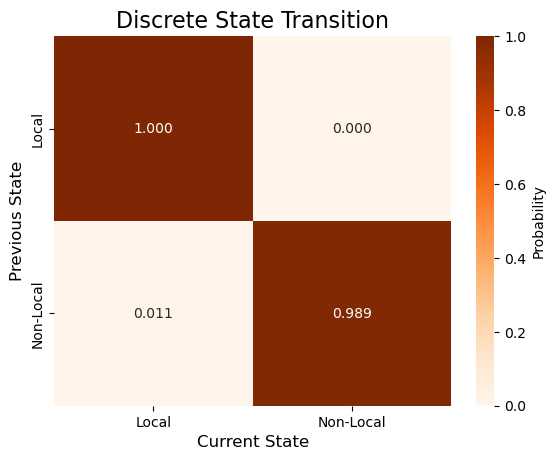

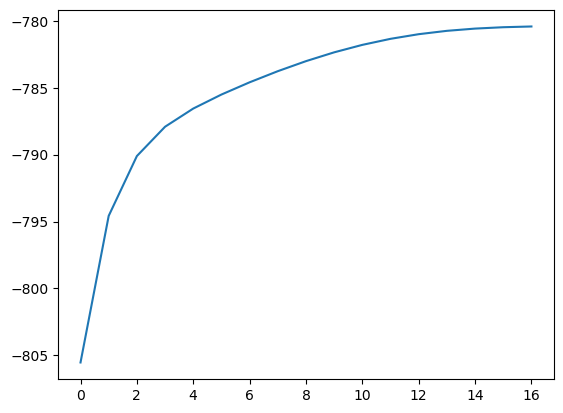

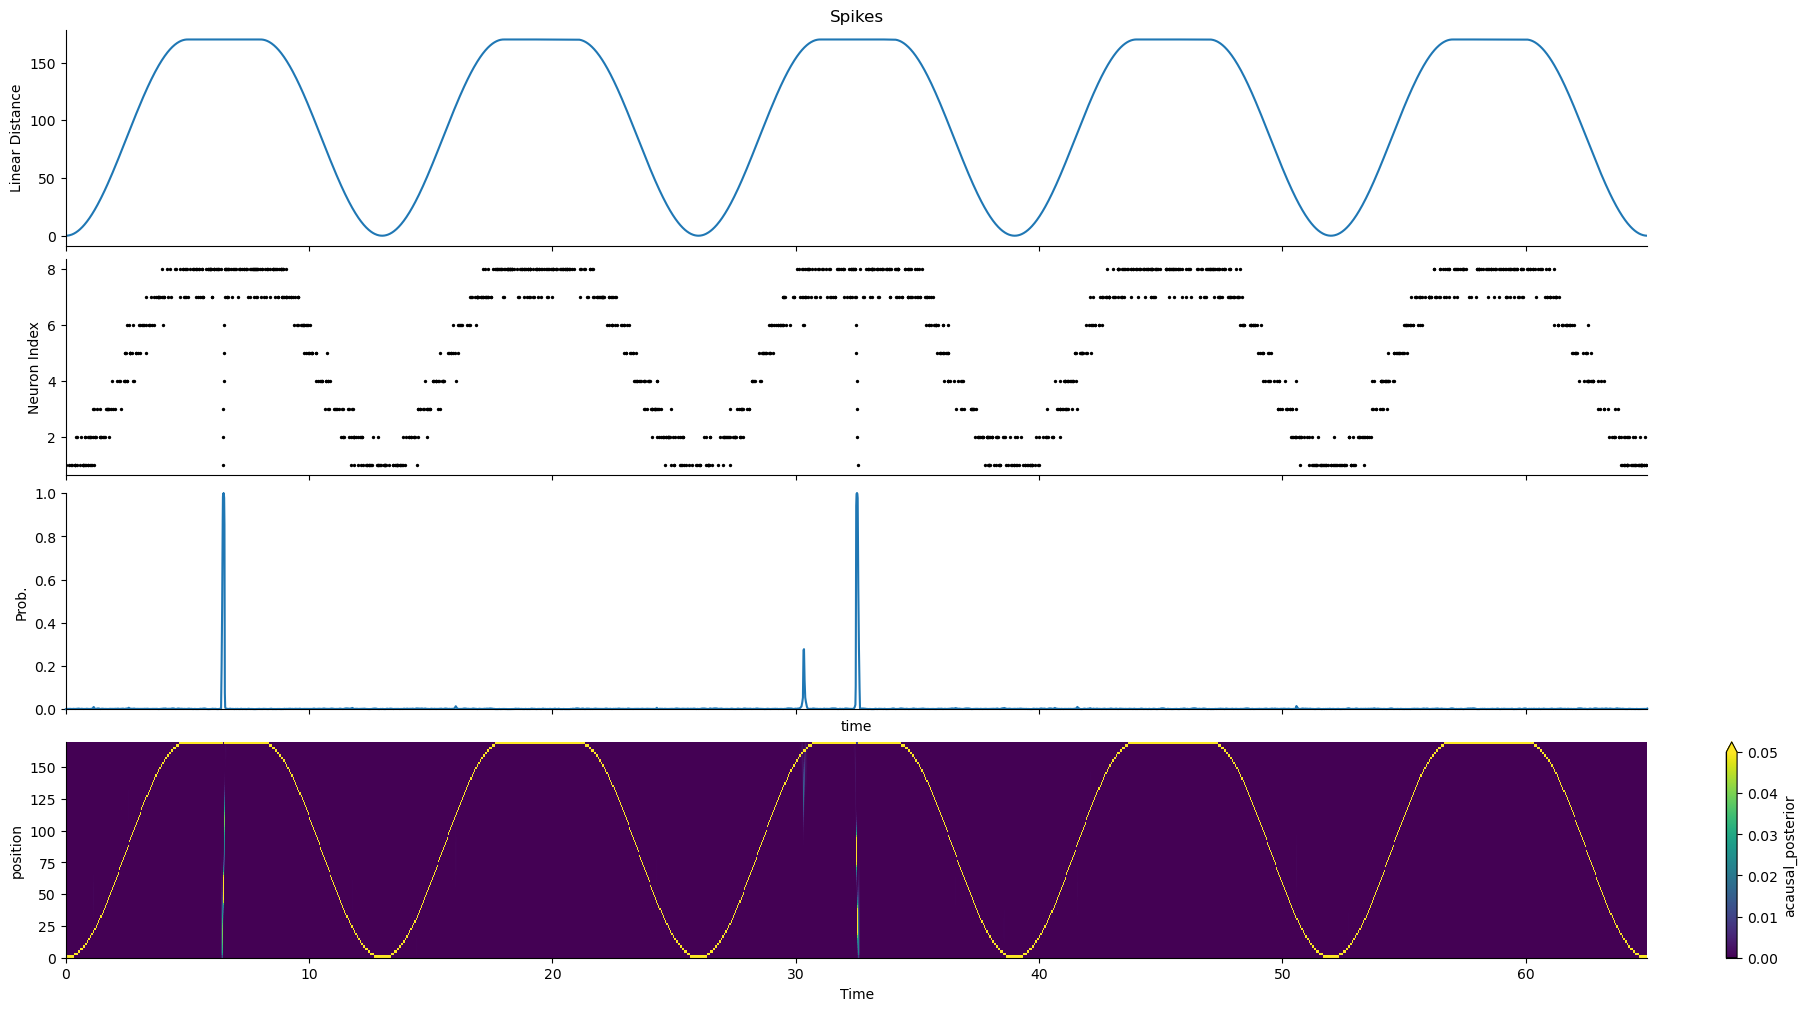

In [5]:
from replay_identification import SortedSpikesDetector

fit_args = dict(position=position, spikes=spikes)
predict_args = dict(position=position, spikes=spikes, time=time)
detector = SortedSpikesDetector(
    discrete_state_transition_type='make_from_user_specified_diagonal')

results, data_log_likelihood = detector.estimate_parameters(
    fit_args,
    predict_args,
    tolerance=1E-4,
    max_iter=20,
    estimate_state_transition=True,
    estimate_likelihood=False)
detector.plot_discrete_state_transition()

plt.figure()
plt.plot(data_log_likelihood)

plot_results(results, time, spikes, position)


INFO:replay_identification.detectors:Fitting discrete state transition...
INFO:replay_identification.detectors:Fitting continuous state transition...
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 0, likelihood: -805.5340249810135
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 1, likelihood: -794.6172853842324, change: 10.916739596781099
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 2, likelihood: -786.4816639180992, change: 8.135621466133216
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 3, likelihood: -782.4846645489791, change: 3.99699936912009
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 4, likelihood: -780.1739493418944, change: 2.3107152070847405
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 5, likelihood: -778.5977890212205, change: 1.576160320673921
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 6, likelihood: -777.3953876399669, change: 1.202401381253594
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 7, likelihood: -776.4302370578923, change: 0.965150582074557
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 8, likelihood: -775.6467961247647, change: 0.783440933127622
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 9, likelihood: -776.0213590245736, change: -0.37456289980889323
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 10, likelihood: -775.5370138228345, change: 0.4843452017390746
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 11, likelihood: -775.1761512763278, change: 0.36086254650672345
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 12, likelihood: -774.9257115519804, change: 0.2504397243474159
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 13, likelihood: -774.7649542853045, change: 0.16075726667588697
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 14, likelihood: -774.6664011611426, change: 0.09855312416186734
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 15, likelihood: -776.9351865148858, change: -2.2687853537431693
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 16, likelihood: -777.0285165983938, change: -0.09333008350802174
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 17, likelihood: -777.0908593316723, change: -0.06234273327845585


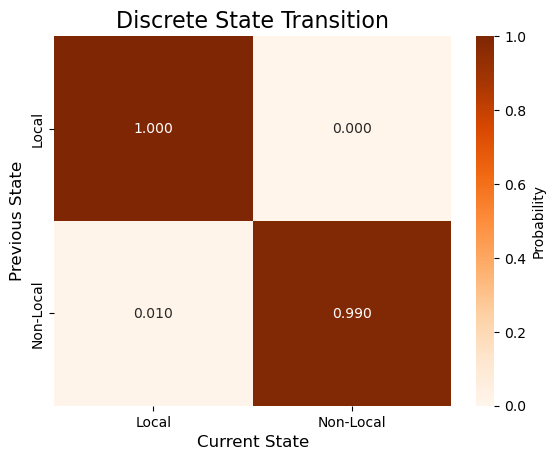

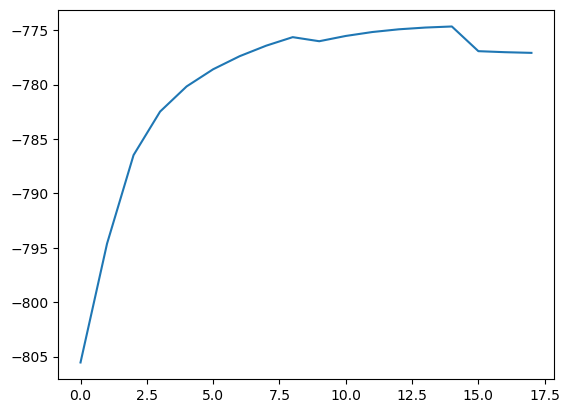

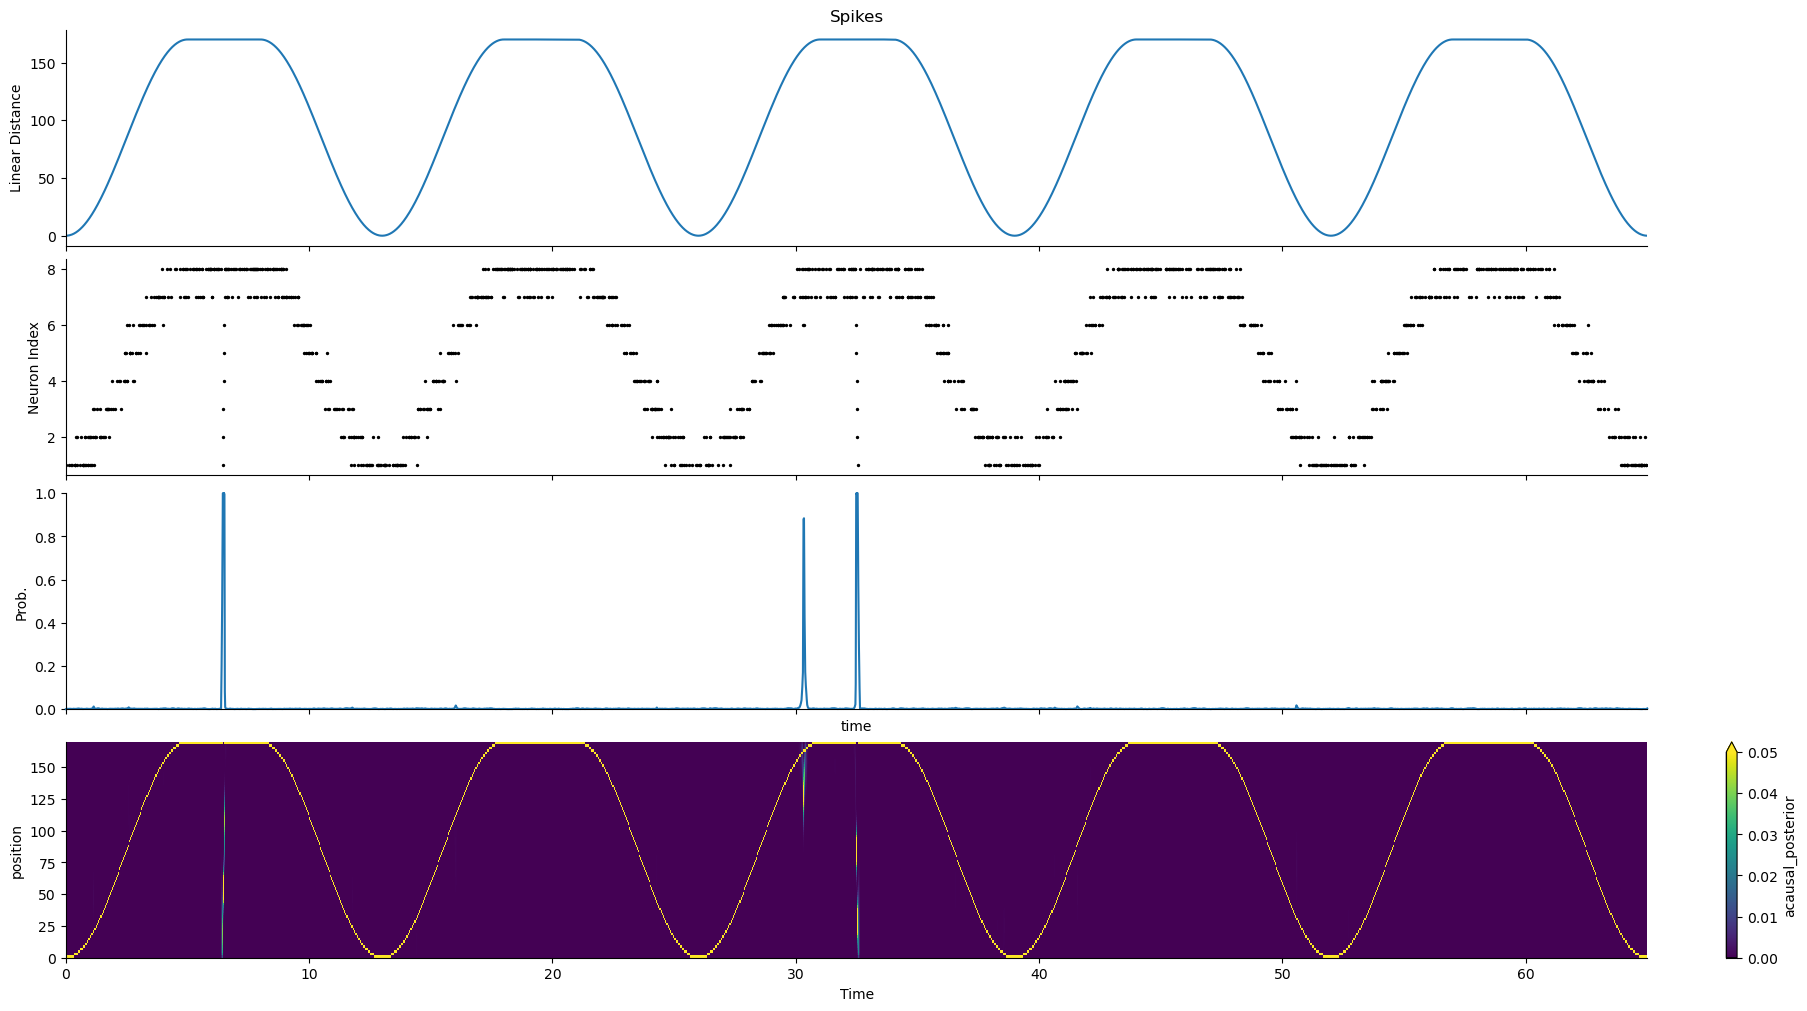

In [6]:
from replay_identification import SortedSpikesDetector

fit_args = dict(position=position, spikes=spikes)
predict_args = dict(position=position, spikes=spikes, time=time)
detector = SortedSpikesDetector(
    discrete_state_transition_type='make_from_user_specified_diagonal')

results, data_log_likelihood = detector.estimate_parameters(
    fit_args,
    predict_args,
    tolerance=1E-4,
    max_iter=20,
    estimate_state_transition=True,
    estimate_likelihood=True)
detector.plot_discrete_state_transition()

plt.figure()
plt.plot(data_log_likelihood)

plot_results(results, time, spikes, position)
